We have MNIST dataset with 60 000 pictures of handwritten digits 28 by 28 pixels.

We create neural network with 1 hidden layer with 128 nodes and such NN can recognize handwritten digits with 98% accuracy in 10 seconds!

Let's download MNIST dataset

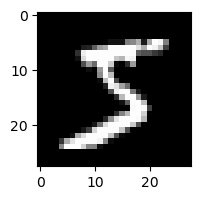

In [1]:
import tensorflow as tf

mnist = tf.keras.datasets.mnist
(x_train, y_train), (x_test, y_test) = mnist.load_data() # hard-written digits
x_train, x_test = x_train / 255.0, x_test / 255.0  # normalize intensity of white color

import matplotlib.pyplot as plt
plt.figure(figsize=(2,2))
plt.imshow(x_train[0])
plt.gray()
plt.show()

Let's create NN and train NN

In [4]:
model = tf.keras.models.Sequential([
  tf.keras.layers.Flatten(input_shape=(28, 28)),
  tf.keras.layers.Dense(128, activation='relu'),
  tf.keras.layers.Dropout(0.2), #
  tf.keras.layers.Dense(10) #, tf.keras.layers.Softmax()
])
print(model.summary())

loss_fn = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True)

model.compile(optimizer='adam',
              loss=loss_fn,
              metrics=['accuracy'])

model.fit(x_train, y_train, epochs=5)

accuracy = model.evaluate(x_test,  y_test, verbose=2)[1]
print('------------------------------')
print('Accuracy is {:.2f}'.format(accuracy*100), '%')

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_2 (Flatten)         (None, 784)               0         
                                                                 
 dense_4 (Dense)             (None, 128)               100480    
                                                                 
 dropout_2 (Dropout)         (None, 128)               0         
                                                                 
 dense_5 (Dense)             (None, 10)                1290      
                                                                 
Total params: 101,770
Trainable params: 101,770
Non-trainable params: 0
_________________________________________________________________
None
Epoch 1/5
1875/1875 [==============================] - 2s 1ms/step - loss: 0.2942 - accuracy: 0.9145
Epoch 2/5
1875/1875 [==============================] - 2s 1ms/step - loss:

98% accuracy!!